In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])

In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
#Renaming the columns
df.rename(columns={'Date':'date','Province/State':'state',
                   'Country/Region':'country','Lat':'lat',
                   'Long':'long','Confirmed':'confirmed',
                   'Deaths':'deaths','Recovered':'recovered',
                   'Active':'active'},inplace=True)

In [ ]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df['active']=df['confirmed']-df['deaths']-df['recovered']

In [ ]:
df.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
world=df[df['date']=='2020-07-27']

In [ ]:
world

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
world=world.groupby('country')[['confirmed','deaths','recovered','active']].sum().reset_index()

In [ ]:
world

,country,confirmed,deaths,recovered,active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


**Analyzing active cases in the world on most recent data**

In [ ]:
figure=px.choropleth(world,locations='country',locationmode='country names',hover_name='country',
                     color='active',range_color=[1,10000],color_continuous_scale='blues',
                     title='Countries with Active Cases')
figure.show()

**Analyzing death cases in the world on most recent data**

In [ ]:
figure=px.choropleth(world,locations='country',locationmode='country names',hover_name='country',
                     color='deaths',range_color=[1,10000],color_continuous_scale='greens',
                     title='Countries with Death Cases')
figure.show()

In [ ]:
# Try this plot for confirmed and recovered cases

**Trend of active cases in the world**

In [ ]:
total_cases=df.groupby('date').sum().reset_index()[['date','active']]
total_cases

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


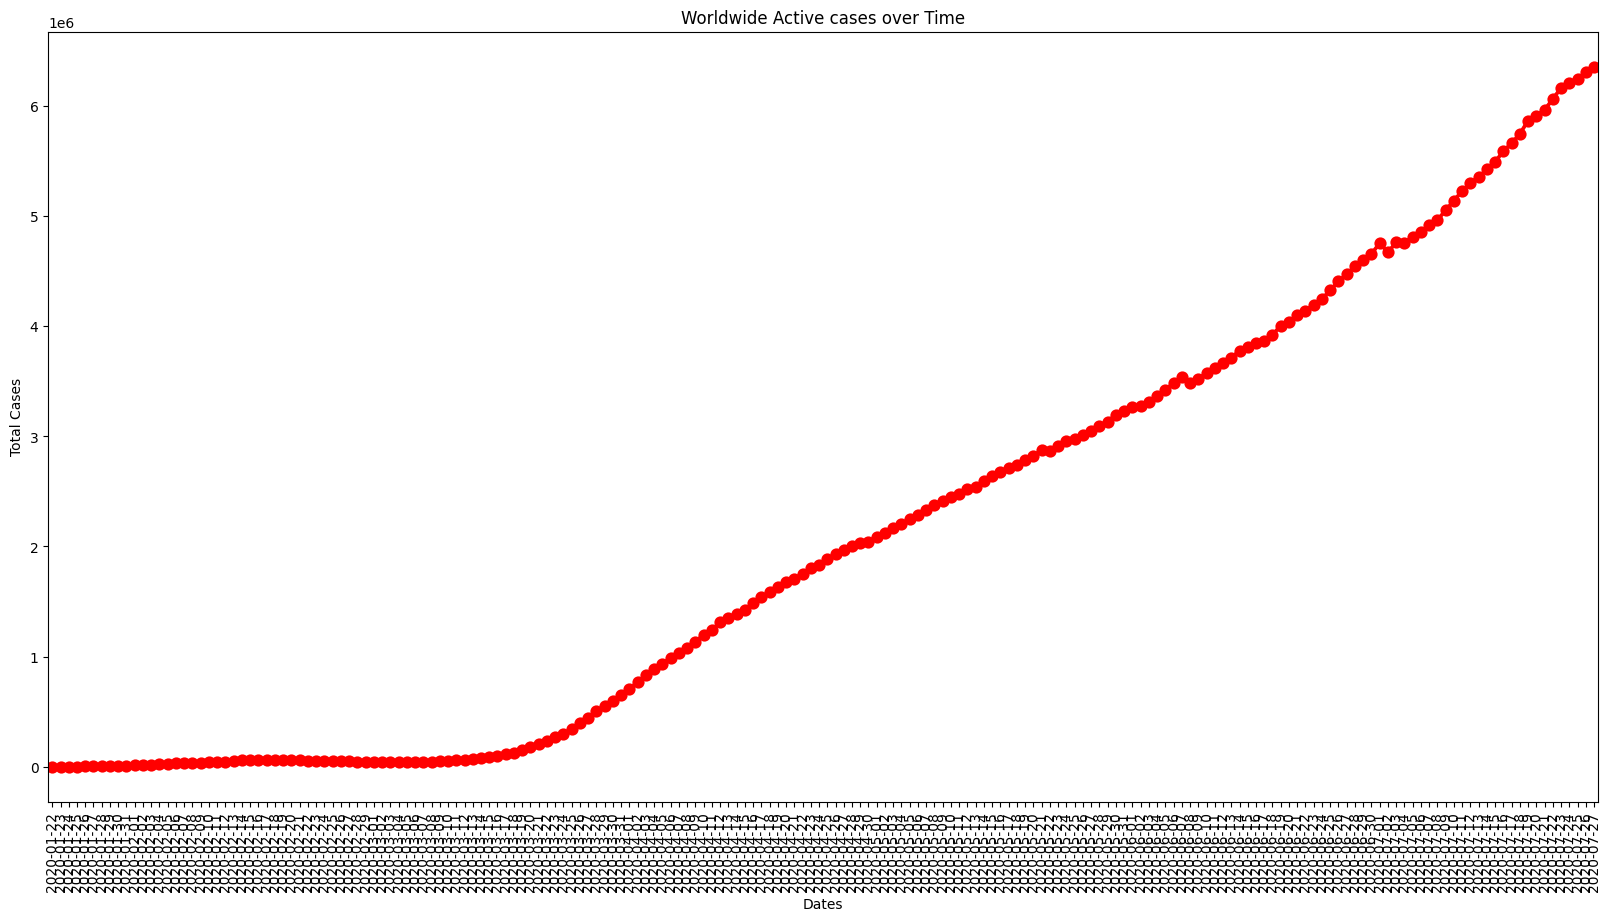

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel('Dates')
plt.xticks(rotation=90)
plt.ylabel('Total Cases')
plt.title('Worldwide Active cases over Time')
ax=sns.pointplot(x=total_cases.date,y=total_cases.active,color='r')

In [ ]:
#Try this plot for confirmed cases, death cases and recovered cases

**Model Building**

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

As we are doing the forecasting of number of cases world wide thus we need to group the data by date column

In [ ]:
Confirmed=df.groupby(['date'])['confirmed'].sum().reset_index()
Active=df.groupby(['date'])['active'].sum().reset_index()
Deaths=df.groupby(['date'])['deaths'].sum().reset_index()
Recovered=df.groupby(['date'])['recovered'].sum().reset_index()

In [ ]:
Confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


**Forecasting for the confirmed cases**

For building a forecasting model using prophet, there should be only 2 column passed.

The column names should always be -> 'ds' , 'y'


In [ ]:
Confirmed.rename(columns={'date':'ds','confirmed':'y'},inplace=True)

In [ ]:
Confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
model=Prophet(interval_width=0.95)
model.fit(Confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5aocokch/7xj09s34.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5aocokch/pj91_5tm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3910', 'data', 'file=/tmp/tmp5aocokch/7xj09s34.json', 'init=/tmp/tmp5aocokch/pj91_5tm.json', 'output', 'file=/tmp/tmp5aocokch/prophet_model3cco4qvh/prophet_model-20240809030101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:01:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:01:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=7)

In [ ]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
future.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast=model.predict(future)

**ds:** Helps you understand which date each forecasted value corresponds to.

**yhat:** Provides the main forecasted value that you would likely use for making decisions.

`yhat_lower` and `yhat_upper`: These gives you a sense of the range within which the actual value is expected to fall,providing a uncertainity in the prediction.

In [ ]:
forecast[['ds','yhat_lower','yhat','yhat_upper']].tail(10)

,ds,yhat_lower,yhat,yhat_upper
185,2020-07-25,1.558506e+07,1.573882e+07,1.589070e+07
186,2020-07-26,1.578089e+07,1.593636e+07,1.609069e+07
187,2020-07-27,1.597371e+07,1.613095e+07,1.630139e+07
188,2020-07-28,1.616491e+07,1.632020e+07,1.647043e+07
189,2020-07-29,1.638107e+07,1.652997e+07,1.668876e+07
190,2020-07-30,1.657789e+07,1.674391e+07,1.691249e+07
191,2020-07-31,1.676949e+07,1.695910e+07,1.711673e+07
192,2020-08-01,1.699768e+07,1.716676e+07,1.733547e+07
193,2020-08-02,1.719409e+07,1.736430e+07,1.753901e+07
194,2020-08-03,1.737227e+07,1.755889e+07,1.773781e+07


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



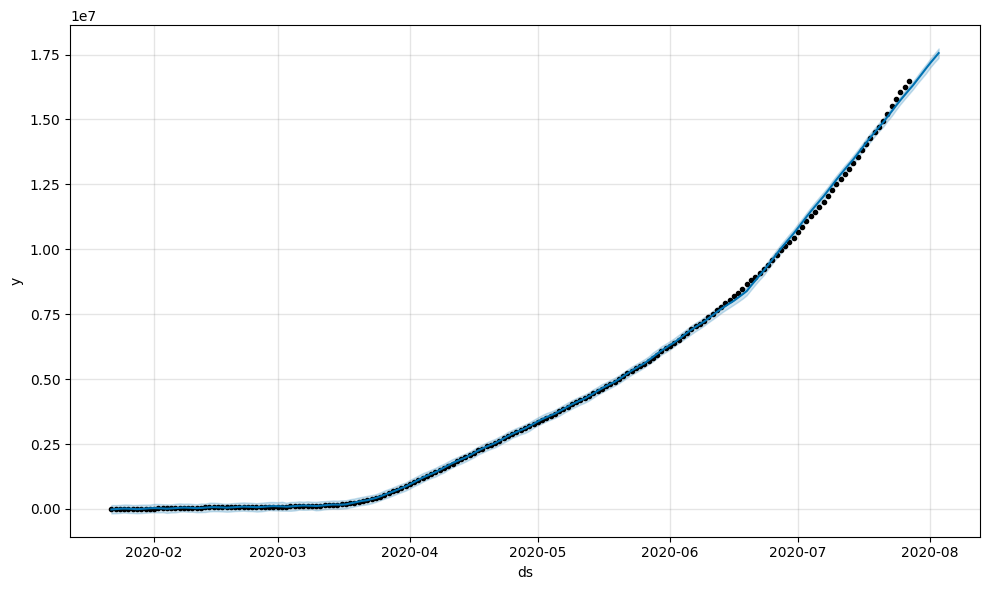

In [ ]:
confirmed_forecast_plot=model.plot(forecast)

In [ ]:
#Repeat this forecasting for active cases, death cases and recovered cases